In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Tutoriels 
- Git ?
- Scalingo : créer une BDD SQL / MongoDB

# Exercices

## 1. Manipulation en `pandas`

Le fichier `worldcities` contient des informations au sujet de 42 905 villes.


- 1. 
 - a. Pour chaque pays, trouver la ville la plus peuplée. Afficher le résultat dans une `Serie` ayant en index le nom du pays.
 - b. Pour chaque pays, calculer le nombre de villes ayant une population supérieure à la moitié de la population de la ville la plus peuplée du pays.
 
- 2. 
 - a. Quel est le pays ayant le plus de valeurs manquantes pour la variable population ?
 - b. Quel est le pourcentage de lignes ayant au moins une valeur manquante ?


- 3. 
 - a. Observer l'output de la méthode `.describe` de `pandas`
 - b. Expliquer en Français en découpant en étapes simples, calculer la DataFrame qui est l'output de cette méthode
 - c. Faire de même en SQL
 - d. Écrire une fonction `describe` qui prend en argument une DataFrame et renvoie le même résultat que la méthode `describe`

- 4. 
 - a. À l'aide d'une recherche sur StackOverflow, écrire une fonction `distance_on_globe` qui prend en argument deux points sur le globe (ie deuxcouples de latitude longitude) et qui renvoie la distance en km entre ces deux points
 - b. Quelle est la distance moyenne entre Paris et les villes Allemandes ? 

- 5. 
 - a. Créer une variable `population_group` qui correspond à un groupe de population  : 
     - entre 0 et 250_000 habitants
     - entre 250_001 et 500_000 habitants
     - ...
     - entre 1_750_001 et 2_000_000 habitants
     - Plus de 2_000_001 habitants
    
 - b. Pour chaque pays, calculer le groupe qui compte le plus de villes
 
 
- 6. 
 - a. Créer une variable `population_group_2` qui correspond à un groupe de population : 
     - les 10% villes les moins peuplées
     - les 10% suivant
     - ...
     - les 10% villes les plus peuplées 
(il y a 10 groupes)
 
 - b. Quelle est la population minimale des 10% villes les plus peuplées ?
 
 - c. Tracer un diagramme en baton avec en abscisse le numéro du groupe et en ordonnée la population minimale du groupe

In [147]:
df = pd.read_csv("../data/simplemaps/worldcities.csv")
# df[["city", "population"]]

In [148]:
df.groupby('country').first()['city'].loc['France']

'Paris'

### Question 1.a.

In [149]:
# Méthode 1
# On trie par population 
# pour ensuite sélectionner la première ville pour chaque pays
df.sort_values('population', ascending=False).groupby('country').first()['city']

# Méthode 2
# On peut aussi chercher l'index max de chaque liste de la variable population
# et renvoie la valeur à cette index dans la liste de la variable city
ccp = df.groupby(["country"])[["city", "population"]].agg(list)
ccp["mean_population"] = ccp["population"].map(lambda l: np.nanmean(l))

# On sélectionne pour chaque pays, les villes avec
# une population supérieure à 75 % de la moyenne
population_above_75_percent_of_mean = ccp.apply(
    lambda r: [
        c 
        for c,p in zip(r.city, r.population) if p > 0.75 * r.mean_population],
    axis=1
)
population_above_75_percent_of_mean

ccp

/var/folders/yf/7zryq8v115v8hjpz3_522bvm0000gn/T/ipykernel_58450/32287963.py:10: RuntimeWarning: Mean of empty slice
  ccp["mean_population"] = ccp["population"].map(lambda l: np.nanmean(l))


,city,population,mean_population
country,,,
Afghanistan,"[Kabul, Kandahār, Herāt, Mazār-e Sharīf, Jalāl...","[4273156.0, 614254.0, 556205.0, 469247.0, 2633...",214890.825000
Albania,"[Tirana, Vlorë, Kamëz, Fier, Durrës, Shkodër, ...","[418495.0, 130827.0, 126777.0, 120655.0, 11324...",32773.215686
Algeria,"[Algiers, Oran, Constantine, Blida, Batna, Sét...","[3415811.0, 852000.0, 448374.0, 331779.0, 2906...",88606.736842
American Samoa,[Pago Pago],[12576.0],12576.000000
Andorra,"[Andorra la Vella, Escaldes-Engordany, Encamp,...","[22615.0, 14521.0, 12338.0, 10076.0, 9156.0, 4...",11050.571429
...,...,...,...
Wallis And Futuna,"[Mata-Utu, Leava]","[nan, nan]",NaN
West Bank,[Al Quds],[nan],NaN
Yemen,"[Sanaa, Ta‘izz, Al Ḩudaydah, Aden, Ibb, Ibb, D...","[2957000.0, 615467.0, 548433.0, 507355.0, 3508...",174713.842105


### Question 1.b

In [150]:
max_population_in_country = df.sort_values("population", ascending=False).groupby("country").first()["population"]
df["max_population_in_country"] = df.country.map(max_population_in_country)

# Tout le temps la valeur de Tokyo : environ 40M d'habitants
print(df[df.country=="Japan"].max_population_in_country.unique())

# On garde les lignes (donc les villes) qui ont une valeur de population
# Supérieur à la population max dans une ville du pays divisée par 2
subset = df[df["population"] > (df["max_population_in_country"] / 2)]

# Aucune valeurs manquantes
assert (~df.country.isnull()).sum() == len(df)

subset.groupby("country").size().sort_values(ascending=False)

[39105000.]


country
Malta            8
China            6
Liechtenstein    6
Taiwan           5
Kosovo           5
                ..
Indonesia        1
Iran             1
Iraq             1
Ireland          1
Zimbabwe         1
Length: 224, dtype: int64

### Question 2.a
- Slovénie avec 140 valeurs nulles

In [151]:
# On crée 'un mask' dans une nouvelle volonne
df["is_population_null"] =  df.population.isnull()
df.groupby("country").is_population_null.sum().sort_values(ascending=False).head(1)

country
Slovenia    140
Name: is_population_null, dtype: int64

### Question 2.b

In [152]:
# Qui vaut True si au moins une valeurs nulles
df["has_any_null"] = df.isnull().any(axis=1)

percent = round(100 * df["has_any_null"].sum() / (df.shape[0]), 2)
print(f'Il y a {percent}% des lignes qui ont au moins une valeur manquante')

# Note : les colonnes et les lignes sont des séries
# avec axis, on change le sens dans lequel on fait une opération vectorisée


# Explications any & all

# Any & All en Pandas
all_pandas = pd.Series([True, True, True]).all()
print(all_pandas)
any_pandas = pd.Series([True, False, False]).any()
print(any_pandas)

# Any & All en Python
all_python = all([True, True, True])
print(all_python)
any_python = any([True, False, True])
print(any_python)

Il y a 78.94% des lignes qui ont au moins une valeur manquante
True
True
True
True


### Question 3.
- `.describe` renvoie des statistiques (**uniquement**) pour les variables quantitatives
    - `count` : le nombre de valeurs non nulles
    - `mean` : la moyenne des valeurs non nulles 
    - `std` : l'écart type (standard deviation) des valeurs non nulles
    - `min` : le min des valeurs non nulles
    - `25%` : le premier quartile des valeurs non nulles
    - `50%` : le deuxieme quartile des valeurs non nulles
    - `75%` : le troisieme quartile des valeurs non nulles
    - `max` : le min des valeurs non nulles


In [153]:
# COMPRENDRE np.mean, np.nanmean, et .mean

l = [0, 10, 20] # la moyenne 10
l_with_nan = [0, 10, 20, np.nan] # la moyenne doit être 10 ! (on exclut au numérateur et au dénominateur les np.nan)
print(np.mean(l))
print(np.nanmean(l_with_nan))

pd.Series(l).mean()
pd.Series(l_with_nan).mean()  # calcule dirrectement avec np.nanmean

10.0
10.0


10.0

In [154]:
df = pd.read_csv("../data/simplemaps/worldcities.csv")
df.describe()

# EN SQL : 
## pour les colonnes INTEGER, FLOAT ...
## on calculerait COUNT(*), MEAN(*) etc...

def describe_not_pandaesque(df):
    
    # Filtrer pour ne garder que les variables quantitatives
    df = df.select_dtypes(include=np.number)
    
    # Itérer sur les fonctions statistiques
    stat_funcs = {
        # count : la longueur de la liste qui contient les valeurs non nulles
        "count": lambda s: len([value for value in s if not np.isnan(value)]),
        # La moyenne
        "mean": np.nanmean,
        # Ecart type
        "std": np.nanstd,
        # Min
        "min": np.nanmin,
        # Percentile 25
        "25%": lambda s: np.nanpercentile(s, 25),
        # Percentile 50
        "50%": lambda s: np.nanpercentile(s, 50),
        # Percentile 75
        "75%": lambda s: np.nanpercentile(s, 75),   
        # Max
        "max": np.nanmax
    }
    
    # Calcule des statistics
    statistics = []
    for func in stat_funcs.values() :
        row = []
        # Calculer chacune des lignes (en itérant sur les variables) et la stocker dans une liste
        for variable in df.columns:
            stat = func(df[variable])
            row.append(stat)
        statistics.append(row)
        
    # Créer une DataFrame à partir de ces données
    # Spécifier les bons noms de colonnes et d'index
    statistics = pd.DataFrame(
        statistics,
        index=stat_funcs.keys(),
        columns=df.columns
        
    )
    return statistics


def describe_pandaesque(df):
    pass

df_describe = describe_not_pandaesque(df)
# Variation relative = (exp - th) / th
# experimentale = la nôtre df_describe
# théorique = celle de pandas

# Toutes les valeurs ont 0% d'écart 
# sauf les écart types qui ont autour de 0.0012 % d'écart
100 * (df_describe - df.describe()) / df.describe()

,lat,lng,population,id
count,0.000000,0.000000,0.000000,0.000000
mean,0.000000,0.000000,0.000000,0.000000
std,-0.001165,-0.001165,-0.001185,-0.001165
min,-0.000000,-0.000000,NaN,0.000000
25%,0.000000,-0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000


### Question 4
- from : https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

In [161]:
from math import sin, cos, sqrt, atan2,  pi

marseille = df[df.city=='Marseille'].iloc[0]
paris = df[df.city=='Paris'].iloc[0]

def compute_distance_on_globe(lat1, lon1, lat2, lon2):

    # Approximate radius of earth in km
    R = 6373.0

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    
    return distance


########## CONVERSION DEGRÉS VERS RADIANS 
########## : fois Pi puis divisé par 180
lat1 = marseille.lat * pi / 180
lon1 = marseille.lng  * pi / 180

lat2 = paris.lat * pi / 180
lon2 = paris.lng * pi / 180

distance = compute_distance_on_globe(lat1, lon1, lat2, lon2)

print(f"Distance Paris à Marseille: {round(distance, 2)} km")

Distance Paris à Marseille: 660.7 km


### Question 5.a & 6.a

In [165]:
# Float !!
df.population

0        39105000.0
1        35362000.0
2        31870000.0
3        23971000.0
4        22495000.0
            ...    
42900          10.0
42901          10.0
42902          10.0
42903          10.0
42904           0.0
Name: population, Length: 42905, dtype: float64

In [173]:
print(249_999 // 250_000)
print(500_001 // 250_000)
print(750_004 // 250_000)
print(784_564 // 250_000)
print(2_000_156 // 250_000)
print(3_000_156 // 250_000)

0
2
3
3
8
12


In [198]:
def get_population_group(pop):
    if np.isnan(pop):
        return np.nan
    elif pop > 2_000_000:
        return 8
    return int(pop) // 250_000

df["population_group"] = df["population"].map(get_population_group)
print(df["population_group"].value_counts())

# Valeurs nulles
print(df.population.isnull().sum())
print(df.population.isna().sum())

np.nanpercentile(df["population"], 0)
np.nanpercentile(df["population"], 100)

percentiles = [
    np.nanpercentile(df["population"], percent*10)
    for percent in range(0, 11)
]

def get_population_group_2(pop, percentiles):
    if np.isnan(pop):
        return np.nan
    
    for group, p in enumerate(percentiles):
        # Dans le pire des cas des cas
        # le test réussi pour le dernier percentile car c'est le max
        
        # Une seule classe pour le min == 0 et le premier groupe
        if pop >= p:
            continue
        else:
            return group
    
    # Shouldnt be attained but as a security
    return 9
    
df["population_group"] = df["population"].map(
    lambda pop: get_population_group_2(pop, percentiles)
)
df["population_group"].value_counts()

0.0    39892
1.0      997
2.0      408
8.0      381
3.0      183
4.0      149
5.0       73
6.0       57
7.0       40
Name: population_group, dtype: int64
725
725


5.0     4220
3.0     4220
9.0     4219
8.0     4218
7.0     4218
6.0     4218
10.0    4217
2.0     4217
1.0     4217
4.0     4216
Name: population_group, dtype: int64

In [193]:
df["population_group"].value_counts()

0.0    42175
9.0        5
Name: population_group, dtype: int64

## 2. Régression linéaire simple : comparaison
L'objectif est de comparer trois implémentations de la régression linéaire : 
- une en utilisant `sklearn` (>='1.0.2')
- une en utilisant `statsmodels` (>='0.13.2')
- l'une en calculant les coefficients "à la main" 


On a généré ci-dessous un nuage de points, on a représenté $Y$ en fonction de $X$.

L'objectif de la régression linéaire simple sans intercepte est de trouver deux coefficients $a$ et $b$ tels que :

$$ Y = ax  + err $$


L'objectif de la régression linéaire simple avec intercepte est de trouver deux coefficients $a$ et $b$ tels que :

$$ Y = ax + b + err $$


1. Entraîner un modèle de régression linéaire entre $x$ et $y$ avec `scikit-learn`
2. Entraîner un modèle de régression linéaire entre $x$ et $y$ avec `statsmodels` (on pourra s'aider de StackoVerflow)
3. Entraîner un modèle de régression linéaire entre $x$ et $y$ en remarquant que le coefficient $a$ est égale à $\frac{Cov(X, Y)}{Var(X}$ (on pourra chercher comment calculer la covariance et la variance en `pandas` ou `numpy`).
4. Créer une colonne `y_pred` qui contient les prédictions pour toutes les données à disposition

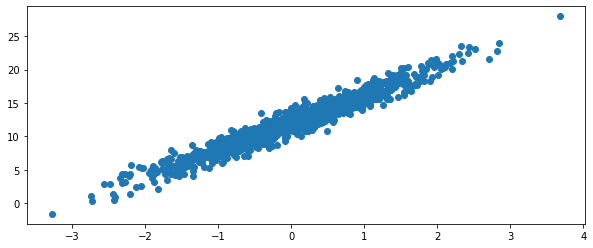

In [157]:
N_OBS = 1000
A = 4
B = 12

x = np.random.randn(1000)  # 4 lignes, 2 colonnes
errors = np.random.randn(1000) 
y = A*x + B + errors

plt.figure(figsize=(10, 4))
plt.scatter(x, y)

## 3. Git

1. Créer un repository vide sous le nom de `projet_data_<numero_du_groupe>` 
2. Ajouter l'utilisateur `Selimmmm` (il y a 4 m).
3. Ajouter le notebook suivant dans un dossier exercice et pousser sur la branche remote
4. Ajouter l'URL complète du repository de votre groupe : 
    - https://docs.google.com/spreadsheets/d/18WxnG-luwRS6C-djbpl-gTyQgorBaQLqBdLq2nGiPLY/edit#gid=0

## 4. Manipulation data avec `SQL` (ou `MongoDb`)

On reprend la situation de l'exercice 2.

**Il faut au préalable :**
- avoir créé un compte sur Scalingo
- avoir provisionné une app sur Scalingo
- avoir provisionné en addon une base SQL (ou MongoDB) avec le plan Starter (gratuit)
- avoir activé l'option 'Internet Accessibility' (sinon pas d'accessibilité hors réseau interne Scalingo)

1. Pour le modèle de votre choix, créer une DataFrame qui contient en colonnes `x`, `y` et `y_pred` et insérer les données dans une table SQL / une collection MongoDB sur Scalingo (la table / la collection doit être distante). On pourra utiliser `pandas.to_sql`

2. Lire les données de la table créée. On pourra utiliser `pd.read_sql`

In [120]:
!pip3 show sqlalchemy

Name: SQLAlchemy
Version: 1.3.22
Summary: Database Abstraction Library
Home-page: http://www.sqlalchemy.org
Author: Mike Bayer
Author-email: mike_mp@zzzcomputing.com
License: MIT
Location: /usr/local/lib/python3.9/site-packages
Requires: 
Required-by: 
